# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### Context :
E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected.

### Objectives :

Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1.   Do the users spend more time on the new landing page than on the existing landing page?
2.   Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3.   Does the converted status depend on the preferred language?
4.   Is the time spent on the new page the same for the different language users?


### Data Dictionary :
1. user_id - Unique user ID of the person visiting the website
2. group - Whether the user belongs to the first group (control) or the second group (treatment)
3. landing_page - Whether the landing page is new or old
4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5. converted - Whether the user gets converted to a subscriber of the news portal or not
6. language_preferred - Language chosen by the user to view the landing page




## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
pd.set_option("display.float_format",lambda x:"%.2f"%x)

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

## Reading the Data into a DataFrame

In [3]:
df=pd.read_csv('C:\\Users\\DELL\\Downloads\\abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
df.shape

(100, 6)

### Observations:
There are **100 Rows** and **6 Columns** in the given data.



In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.00,NaN,NaN,NaN,546517.00,52.30,546443.00,546467.75,546492.50,546567.25,546592.00
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.00,NaN,NaN,NaN,5.38,2.38,0.19,3.88,5.42,7.02,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations:
*   The **Minimum, Average, and Maximum** time spent by the users on the page is **0.19 mins** , **5.38 mins** and **10.71 mins** respectively.
*   The **Average** and **Median** time spent on the page is almost similar. (Normal Distribution)




In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Observations:
*   There are **2 numerical** (1 int & 1 float) and 4 object datatypes.

In [9]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Observations:
*   There are **no missing** values in the data.

In [10]:
df.duplicated().sum()

0

### Observations:
*   There are **no duplicate** values in the data.

### Univariate Analysis

### Group Type (Landing Page):

In [11]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

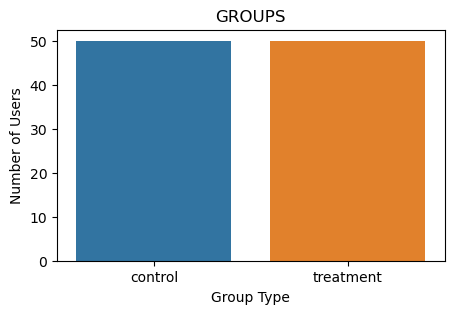

In [12]:
plt.figure(figsize =(5,3))
sns.countplot(data=df,x='group');
plt.title("GROUPS");
plt.xlabel('Group Type');
plt.ylabel('Number of Users');

### Observations:
*   As stated in the Problem statement the 2 groups are equally distributed each with 50 observation .

### Time Spent On The Page :

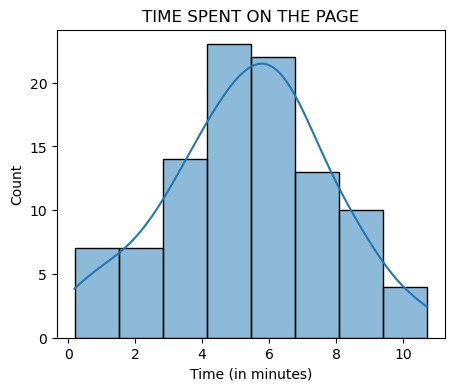

In [13]:
plt.figure(figsize =(5,4))
sns.histplot(df,x='time_spent_on_the_page',kde = True);
plt.title("TIME SPENT ON THE PAGE");
plt.xlabel('Time (in minutes)');
plt.ylabel('Count');

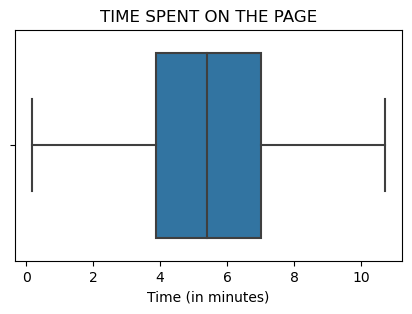

In [14]:
plt.figure(figsize =(5,3))
sns.boxplot(data=df,x='time_spent_on_the_page');
plt.title("TIME SPENT ON THE PAGE");
plt.xlabel('Time (in minutes)');

### Observations:
*   Time spent by the user on the page follows a Normal distribution.
*   There are no outliers present.

### Conversion Rate :

In [15]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

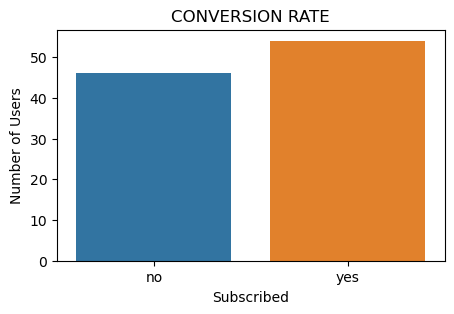

In [16]:
plt.figure(figsize =(5,3))
sns.countplot(data=df,x='converted');
plt.title("CONVERSION RATE");
plt.xlabel('Subscribed');
plt.ylabel('Number of Users');

### Observations:
The users who have subscribed is slightly higher than the users who have not subscribed.
*   subscribed - 54
*   not _subscribed - 46

### Prefered Language :

In [17]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

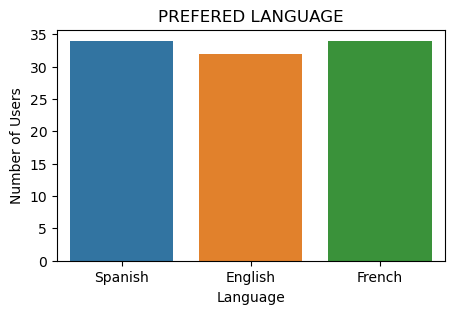

In [18]:
plt.figure(figsize =(5,3))
sns.countplot(data=df,x='language_preferred');
plt.title("PREFERED LANGUAGE");
plt.xlabel('Language');
plt.ylabel('Number of Users');

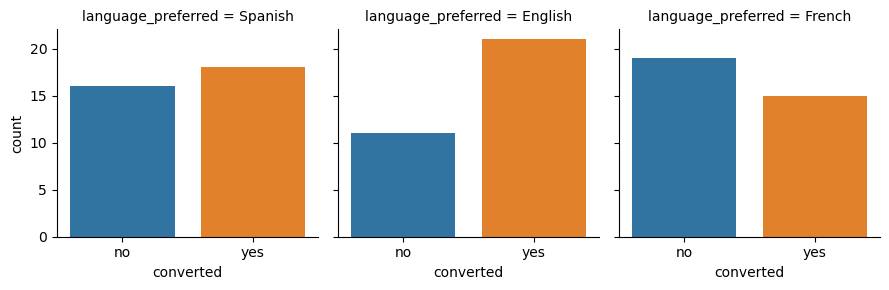

In [19]:
sns.catplot(df, x = 'converted', col = 'language_preferred', kind = 'count',height=3, aspect=2/2);

### Observations:
*   There are three languages provided on each page (old & new).
*   The three languages are English, Spanish & French.
*   Each language has similar number of users
*   The page with English as a preferred langauge has more conversion rate compared to other 2 languages.

### Bivariate Analysis

### Landing Page VS Time Spent :

In [20]:
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new   6.22
old   4.53
Name: time_spent_on_the_page, dtype: float64

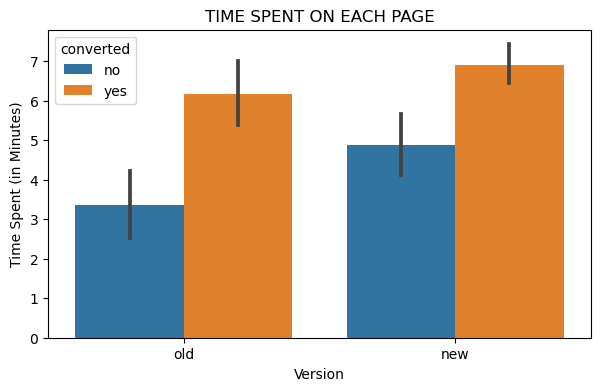

In [21]:
plt.figure(figsize=(7,4))
sns.barplot(df, x = 'landing_page', y = 'time_spent_on_the_page',hue='converted');
plt.title("TIME SPENT ON EACH PAGE");
plt.xlabel('Version');
plt.ylabel('Time Spent (in Minutes)');

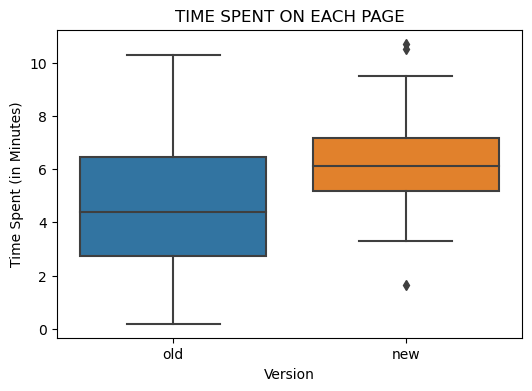

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(df, x = 'landing_page', y = 'time_spent_on_the_page');
plt.title("TIME SPENT ON EACH PAGE");
plt.xlabel('Version');
plt.ylabel('Time Spent (in Minutes)');

### Observations:
*   The new landing page has more engagement time compared to the old page
*   New landing page engagement time show some outliers.
*   Time spent on both the landing pages show normal distribution.

### Conversion (Subscribed or not Subscribed) VS Time Spent :

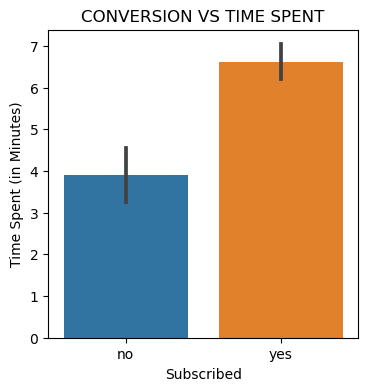

In [23]:
plt.figure(figsize=(4,4))
sns.barplot(df, x = 'converted', y = 'time_spent_on_the_page');
plt.title("CONVERSION VS TIME SPENT");
plt.xlabel('Subscribed');
plt.ylabel('Time Spent (in Minutes)');

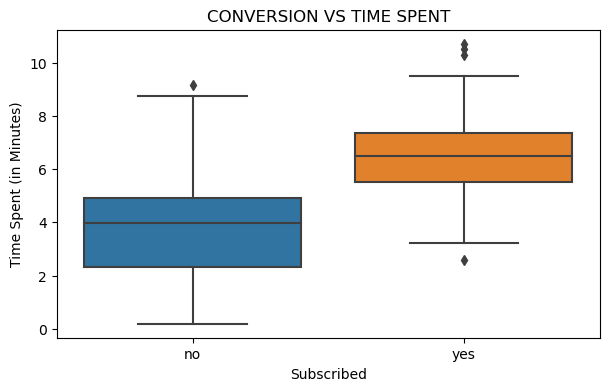

In [24]:
plt.figure(figsize=(7,4))
sns.boxplot(df, x = 'converted', y = 'time_spent_on_the_page');
plt.title("CONVERSION VS TIME SPENT");
plt.xlabel('Subscribed');
plt.ylabel('Time Spent (in Minutes)');

### Observations:
*   Time spent by the users who subscribed is higher.
*   There are a few outliers present as shown in the above boxplot.

### Prefered Language VS  Time Spent:

In [25]:
df.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English   5.56
French    5.25
Spanish   5.33
Name: time_spent_on_the_page, dtype: float64

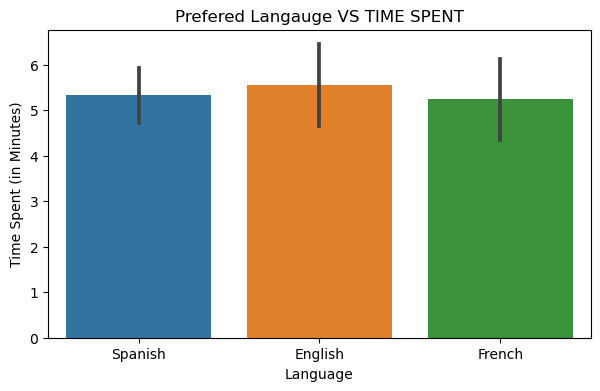

In [26]:
plt.figure(figsize=(7,4))
sns.barplot(df, x = 'language_preferred', y = 'time_spent_on_the_page');
plt.title("Prefered Langauge VS TIME SPENT");
plt.xlabel('Language');
plt.ylabel('Time Spent (in Minutes)');

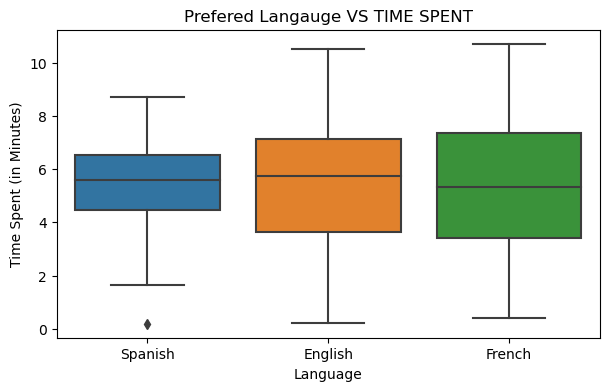

In [27]:
plt.figure(figsize=(7,4))
sns.boxplot(df, x = 'language_preferred', y = 'time_spent_on_the_page');
plt.title("Prefered Langauge VS TIME SPENT");
plt.xlabel('Language');
plt.ylabel('Time Spent (in Minutes)');

### Observations:
*   Average time spent is similar for the different language users.
*   There are few outliers present for the users who prefered Spanish Langauge.

## 1. Do the users spend more time on the new landing page than the existing landing page?

In [28]:
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new   6.22
old   4.53
Name: time_spent_on_the_page, dtype: float64

### Perform Visual Analysis

<Figure size 400x300 with 0 Axes>

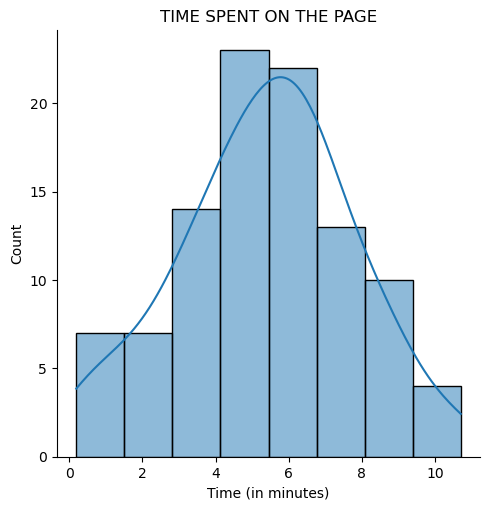

In [29]:
plt.figure(figsize =(4,3))
sns.displot(df,x='time_spent_on_the_page',kde=True);
plt.title("TIME SPENT ON THE PAGE");
plt.xlabel('Time (in minutes)');
plt.ylabel('Count');

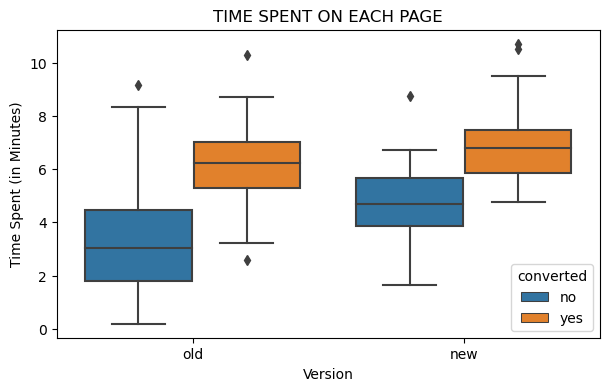

In [30]:
plt.figure(figsize=(7,4))
sns.boxplot(df, x = 'landing_page', y = 'time_spent_on_the_page',hue='converted');
plt.title("TIME SPENT ON EACH PAGE");
plt.xlabel('Version');
plt.ylabel('Time Spent (in Minutes)');

### Step 1: Define the null and alternate hypotheses

**Null Hypothesis**
**H0:**
 Time spent by the user is **equal** on both the new and old landing page

**Alternate Hypothesis**
**Ha:**
 Time spent by the user on the  new landing page is **higher** compared to the existing landing page

Let **μ1 and μ2**
 be the mean time spent by the user on the existing and the new landing page respectively.

Mathematically, the above formulated hypotheses can be written as:

**H0**:  **μ1** **=**  **μ2**


**Ha**:  **μ1** **<** **μ2**

In [31]:
old_page_mean=round(df[df['landing_page']=='old']['time_spent_on_the_page'].mean(),2)
print('The average time spent on old page is',old_page_mean)
new_page_mean=round(df[df['landing_page']=='new']['time_spent_on_the_page'].mean(),2)
print('The average time spent on new page is ',new_page_mean)
old_page_std=round(df[df['landing_page']=='old']['time_spent_on_the_page'].std(),2)
print('The standard deviation for the time spent on old page is ',old_page_std)
new_page_std=round(df[df['landing_page']=='new']['time_spent_on_the_page'].std(),2)
print('The standard deviation for the time spent on new page is ',new_page_std)

The average time spent on old page is 4.53
The average time spent on new page is  6.22
The standard deviation for the time spent on old page is  2.58
The standard deviation for the time spent on new page is  1.82


### Step 2: Select Appropriate test

* As the histogram above is **Normally distributed** for the sample of above 50 so we assumed Normal distribution
* **Continuous data** - Time spent is measured on a continues scale
* **Independent observations** - the observations are independent of one another.
* **Unknown population standard deviations**
* **Random sampling from the population**


As per the above assumptions we can run **Two sample T-test** for this problem.

### Step 3: Decide the significance level

As per the problem statement the **Significance Level = 0.05**.

### Step 4: Collect and prepare data

In [32]:
old_page=df[df['landing_page']=='old']['time_spent_on_the_page']
new_page=df[df['landing_page']=='new']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [33]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(new_page,old_page, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [34]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the **p-value**  **0.000139** is less than the significance level of **0.05** we reject the null hypothesis. So  the average time spent by the user on the new page is higher than the old page.


**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [35]:
df.groupby('landing_page')['converted'].value_counts(normalize=True)

landing_page  converted
new           yes         0.66
              no          0.34
old           no          0.58
              yes         0.42
Name: converted, dtype: float64

The conversion rate for new landing page and old landing page are 0.66 and 0.42 respectively.

### Perform Visual Analysis

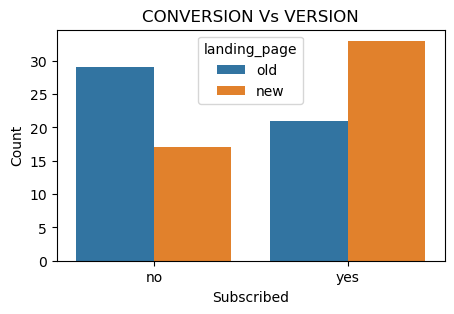

In [36]:
plt.figure(figsize =(5,3))
sns.countplot(data=df,x='converted',hue='landing_page');
plt.title("CONVERSION Vs VERSION");
plt.xlabel('Subscribed');
plt.ylabel('Count');

In [37]:
new_conv=df.loc[(df['landing_page']=='new')&(df['converted']=='yes')].shape[0]
old_conv=df.loc[(df['landing_page']=='old')&(df['converted']=='yes')].shape[0]

In [38]:
print(f'The numbers of new_converted and old_converted are {new_conv} and {old_conv} subscribers respectively.')

The numbers of new_converted and old_converted are 33 and 21 subscribers respectively.


#### Observation :

The proportion  of subscribers for the new landing page is greater than the old landing page based on the given sample.

### Step 1: Define the null and alternate hypotheses

**Null Hypothesis**
**H0:**
 The proportion of users who visit the landing page and get converted (subscribed) for the new page is equal to the conversion rate for the old page.

**Alternate Hypothesis**
**Ha:**
The proportion of users who visit the landing page and get converted (subscribed) for the new page is greater than the conversion rate for the old page.

Let **p1 and p2**
 be the proportion of conversion rate by the user on the old and the new landing page respectively.

Mathematically, the above formulated hypotheses can be written as:

**H0**:  **p1** **=**  **p2**


**Ha**:  **p1** **<** **p2**

### Step 2: Select Appropriate test

*   Binomally distributed population - User converted or not
*   Random sampling from the population - Problem statement states that its randomly sampled  
*   Samples are independent of one another
*   >$np_1 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-21}{50} =29 \geq 10 \\
np_2 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-33}{50} =17 \geq 10 $
*   based on above calculations the binomial distribution approximated to normal distribution






As per the above assumptions we can run **Two proportion Z-test** for this problem.

### Step 3: Decide the significance level

As per the problem statement the **Significance Level = 0.05**.

### Step 4: Collect and prepare data

In [39]:
new_conv=df.loc[(df['landing_page']=='new')&(df['converted']=='yes')].shape[0]
total_new=df.loc[(df['landing_page']=='new')].shape[0]
old_conv=df.loc[(df['landing_page']=='old')&(df['converted']=='yes')].shape[0]
total_old=df.loc[(df['landing_page']=='old')].shape[0]


### Step 5: Calculate the p-value

In [40]:
from statsmodels.stats.proportion import proportions_ztest
stat, p_value = proportions_ztest([new_conv, old_conv], [total_new, total_old], alternative = 'larger')

print('The p-value is',p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [41]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the **p-value**  **0.008026** is less than the significance level of **0.05** we reject the null hypothesis. So the conversion rate of the new landing page is  greater than the conversion rate of old landing page


## 3. Is the conversion and preferred language are independent or related?

In [42]:
df.groupby('language_preferred')['converted'].value_counts(normalize=True)

language_preferred  converted
English             yes         0.66
                    no          0.34
French              no          0.56
                    yes         0.44
Spanish             yes         0.53
                    no          0.47
Name: converted, dtype: float64

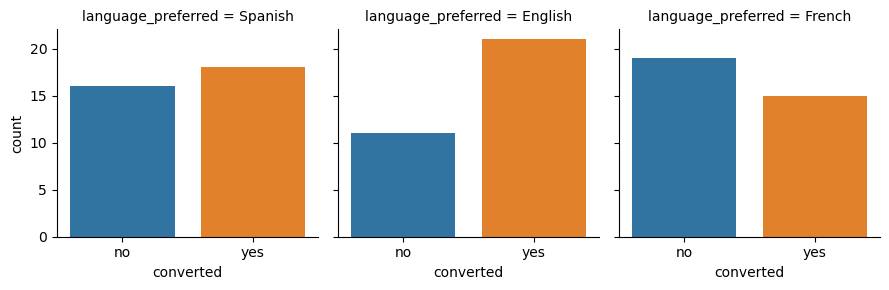

In [43]:
sns.catplot(df, x = 'converted', col = 'language_preferred', kind = 'count',height=3, aspect=2/2);

#### Observation :

*   The users who prefered English have high rate of conversion compared to Spanish and French users.
*   The users who prefered French have low conversion rate.



### Step 1: Define the null and alternate hypotheses

**Null Hypothesis**
**H0:**
 The Conversion rate is independent of the prefered language.

**Alternate Hypothesis**
**Ha:**
 The Conversion rate is dependent of the prefered language.

### Step 2: Select Appropriate test


* Categorical variables
* Expected value of the number of sample observations  is greater than 5.
* Random sampling from the population






As per the above assumptions we can run **Chi-Square Test for Independence** for this problem.

### Step 3: Decide the significance level

As per the problem statement the **Significance Level = 0.05**.

### Step 4: Collect and prepare data

In [44]:
pref_lang=pd.crosstab(df.converted,df.language_preferred)
pref_lang

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [45]:
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(pref_lang)
print('The p-value is',p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [46]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the **p-value**  **0.21298** is greater than the significance level of **0.05** we fail to reject the null hypothesis. So the Conversion rate is independent of the preferred language.


## 4. Is the time spent on the new page same for the different language users?

In [47]:
df_new=df[df['landing_page']=='new']
df_new.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English   6.66
French    6.20
Spanish   5.84
Name: time_spent_on_the_page, dtype: float64

### Perform Visual Analysis

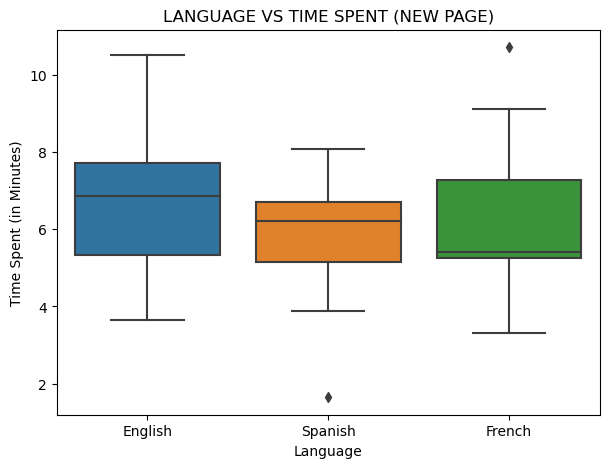

In [48]:
plt.figure(figsize=(7,5))
sns.boxplot(df_new,x='language_preferred',y='time_spent_on_the_page');
plt.title("LANGUAGE VS TIME SPENT (NEW PAGE)");
plt.xlabel('Language');
plt.ylabel('Time Spent (in Minutes)');

#### Observation :

The Average time spent by the users on the new page is almost similar across the different langauges available.

### Step 1: Define the null and alternate hypotheses

**Null Hypothesis**
**H0:**
 The Mean time is same across the languages available.

**Alternate Hypothesis**
**Ha:**
Atleast one language mean time is different from the rest.

Let **μ1,μ2 and μ3**  be the mean time spent on the new page by the English,Spanish and French users respectively.

Mathematically, the above formulated hypotheses can be written as:

**H0**:  **μ1** **=**  **μ2** **=**  **μ3**


**Ha**:  Atleast one of these mean time is different

### Step 2: Select Appropriate test

 Since we are determining  whether the means of the 3 given populations are signiﬁcantly different. We have to perform **One-Way Anova** Test.







Checking if the  Normality and Variance  assumptions hold good by
*   Shapiro-Wilk's Test - For Normality test.
*   Levene test - For equality of Variance.



### Step 3: Decide the significance level

As per the problem statement the **Significance Level = 0.05**.

### Step 4: Collect and prepare data

#### Shapiro-Wilk's Test

*   Null Hypothesis - Time spent follows a normal distribution
*   Alternate Hypothesis - Time spent does not follow a normal distribution.

In [49]:
from scipy import stats
w, p_value = stats.shapiro(df_new['time_spent_on_the_page'])
print('The p-value is',p_value)

The p-value is 0.8040016293525696


#### Observation :

As the  **p-value 0.804** is very large compared to the significance level of **0.05**,we fail to reject the null hypothesis that the response follows the normal distribution.

#### Levene Test

*   Null Hypothesis - All the population variances are equal.
*   Alternate Hypothesis - Atleast one variance is different.

In [50]:
from scipy.stats import levene
statistic, p_value = levene(df_new['time_spent_on_the_page'][df_new['language_preferred']=="English"],
                            df_new['time_spent_on_the_page'][df_new['language_preferred']=="Spanish"],
                            df_new['time_spent_on_the_page'][df_new['language_preferred']=="French"])
print('The p-value is',p_value)

The p-value is 0.46711357711340173


#### Observation :

As the  **p-value 0.4671** is very large compared to the significance level of **0.05**,we fail to reject the null hypothesis that the population variances are equal.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Given in the problem statement.
* Population variances are equal - Yes, The assumption is verified using the Levene's test.



### Now we perfom the One-way Anova Test

### Step 5: Calculate the p-value

In [51]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(df_new['time_spent_on_the_page'][df_new['language_preferred']=="English"],
                            df_new['time_spent_on_the_page'][df_new['language_preferred']=="Spanish"],
                            df_new['time_spent_on_the_page'][df_new['language_preferred']=="French"])
print('The p-value is',p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [52]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

*   As the **p-value**  **0.4320** is greater than the significance level of **0.05** we fail to reject the null hypothesis.
*  Based on the above p-value the average time is same across the different  languages available on the new page.




## Conclusion and Business Recommendations

## Conclusion

1. As stated in the Problem statement the 2 groups are equally distributed each with **50 observations**.
2.  Average time spent by the users on the page is **5.38 mins**.
3. The users who have subscribed is slightly higher than the users who have not subscribed.
	    * subscribed - 54
	    * not_subscribed - 46
4. There are 3 languages provided in the page namely **English, Spanish and French**.
5. The page with **English** as a preferred language has **more subscribers** compared to other 2 languages.  
6. As per the results obtained from the **Two-sample t-test** the new landing page has more engagement time compared to the old landing page.
7. From the **Two-proportion Z test** we can conclude that the conversion rate of the new landing page is greater than the conversion rate of old landing page.
8. Based on the p-value obtained from the **Chi-Square Test for Independence** the Conversion rate is independent of the preferred language.
9. The p-value obtained from the **One-way Anova test** confirms that the average time is same across the different languages available on the new landing page.
    


## Recommendations

**Based on the above analysis** :
1. The New landing page has performed well and has gained more engagement time and subscibers, so it should be  promoted  further for more users.
2. Spending more resources and implementing more features on the new landing page.
3. Deploying the new landing page as the portals main page to gain subscribers after further research with more samples.
4. The prefered language by the users is equal around all the three languages, but the conversion rate for the Spanish and French users is lower compared to the english language so further investigation is required to make it more user friendly.
5. An option for users to provide feedback of their experience on the new landing page to  improve its features and useabilty.

